# Week 3 - Convolutional Neural Networks vs Fully Connected Neural Networks
# August 17, 2023.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
df=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=df.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Q1:Understanding the Dataset and Pre-processing: Implement the following:
## a)Compute and display the number of classes

In [ ]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 10


## b)Compute and display the dimensions of each image.

In [ ]:
#max pooling
#flattened
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

## c)Display one image from each class.

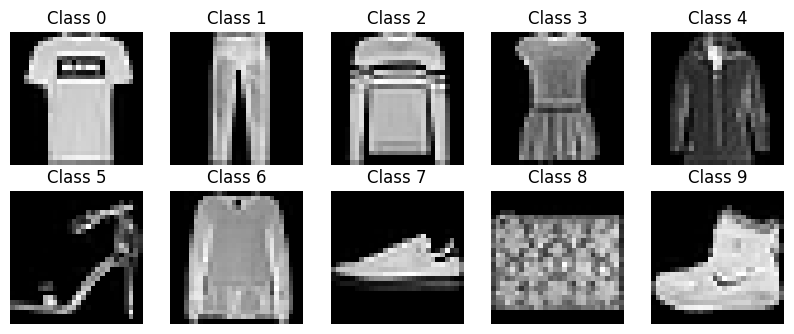

In [ ]:
plt.figure(figsize=(10, 10))
for class_label in range(num_classes):
    plt.subplot(5, 5, class_label + 1)
    plt.imshow(x_train[np.argmax(y_train == class_label)], cmap='gray')
    plt.title(f"Class {class_label}")
    plt.axis("off")
plt.show()

## d)Perform normalization.

In [ ]:
#normalize
#min max normalization
x_train=x_train/255.0
x_test=x_test/255.0

## Q2) Performing experiments on Fully Connected Neural Networks (FCNN):

## a)Design a FCNN which is most suitable for the given dataset:Experimentally choose the best network (the intuitions and learnings from the experiments you have performed in Week-1 and Week-2 will help you choose the hyperparameters for the network).
## b)Train and test the network
## c)Plot the performance curves.

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"))
model.add(tf.keras.layers.Dense(300,activation="relu",name="hiddenlayer1"))
model.add(tf.keras.layers.Dense(100,activation="relu",name="hiddenlayer2"))
model.add(tf.keras.layers.Dense(10,activation="softmax",name="outputlayer"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(x_train, y_train, batch_size=16, epochs=20, validation_split=0.1)

Epoch 1/20
3375/3375 [==============================] - 16s 3ms/step - loss: 0.4849 - accuracy: 0.8252 - val_loss: 0.3955 - val_accuracy: 0.8642
Epoch 2/20
3375/3375 [==============================] - 10s 3ms/step - loss: 0.3671 - accuracy: 0.8648 - val_loss: 0.3474 - val_accuracy: 0.8760
Epoch 3/20
3375/3375 [==============================] - 10s 3ms/step - loss: 0.3306 - accuracy: 0.8791 - val_loss: 0.3306 - val_accuracy: 0.8757
Epoch 4/20
3375/3375 [==============================] - 10s 3ms/step - loss: 0.3074 - accuracy: 0.8857 - val_loss: 0.3264 - val_accuracy: 0.8813
Epoch 5/20
3375/3375 [==============================] - 11s 3ms/step - loss: 0.2897 - accuracy: 0.8921 - val_loss: 0.3103 - val_accuracy: 0.8855
Epoch 6/20
3375/3375 [==============================] - 11s 3ms/step - loss: 0.2726 - accuracy: 0.8984 - val_loss: 0.3467 - val_accuracy: 0.8697
Epoch 7/20
3375/3375 [==============================] - 10s 3ms/step - loss: 0.2633 - accuracy: 0.9019 - val_loss: 0.3126 - val_ac

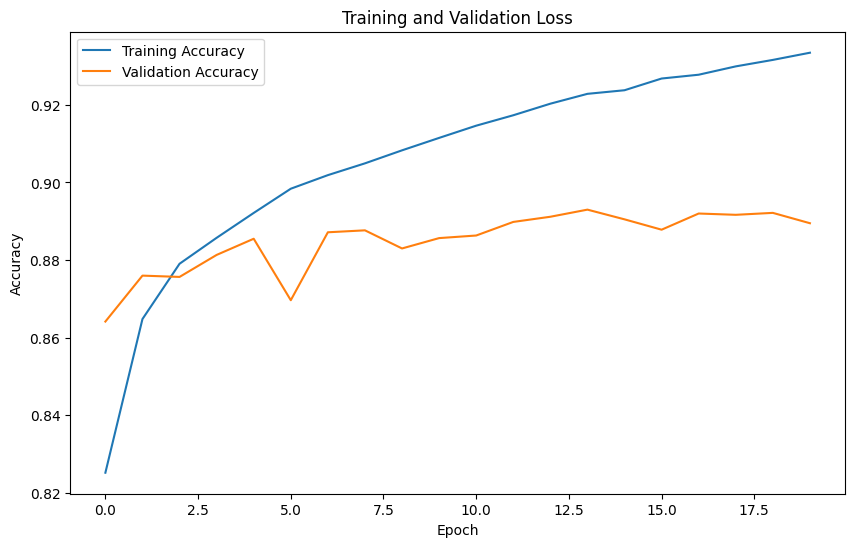

In [ ]:
# Access training and validation loss values from history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Q3) Performing experiments on a Convolutional Neural Networks (CNNs):
## a. Design CNN-1 which contains:                                                                                                         • One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0.                                                • One Pooling layer which uses MAXPOOLING with stride =2.                                                                                 • One hidden layer having number of neurons = 100

In [ ]:
model_cnn1=tf.keras.Sequential()
model_cnn1.add(tf.keras.layers.Input(shape=[28,28,1]))
model_cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5),activation="relu",padding="valid",strides=1)) #padding="same"
model_cnn1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2)) #AveragePooling2D
model_cnn1.add(tf.keras.layers.Flatten())
model_cnn1.add(tf.keras.layers.Dense(100,activation="relu"))
model_cnn1.add(tf.keras.layers.Dense(10,activation="softmax"))

In [ ]:
model_cnn1.compile(optimizer="adam",loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model_cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 100)               460900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462742 (1.77 MB)
Trainable params: 462742 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
history1=model_cnn1.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 14s 4ms/step - loss: 0.4227 - accuracy: 0.8502 - val_loss: 0.3274 - val_accuracy: 0.8867
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2864 - accuracy: 0.8957 - val_loss: 0.3065 - val_accuracy: 0.8882
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2427 - accuracy: 0.9106 - val_loss: 0.2639 - val_accuracy: 0.9048
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2122 - accuracy: 0.9214 - val_loss: 0.2737 - val_accuracy: 0.9012
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1859 - accuracy: 0.9309 - val_loss: 0.2739 - val_accuracy: 0.9038
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1624 - accuracy: 0.9383 - val_loss: 0.2543 - val_accuracy: 0.9140
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1424 - accuracy: 0.9478 - val_loss: 0.2663 - val_accuracy

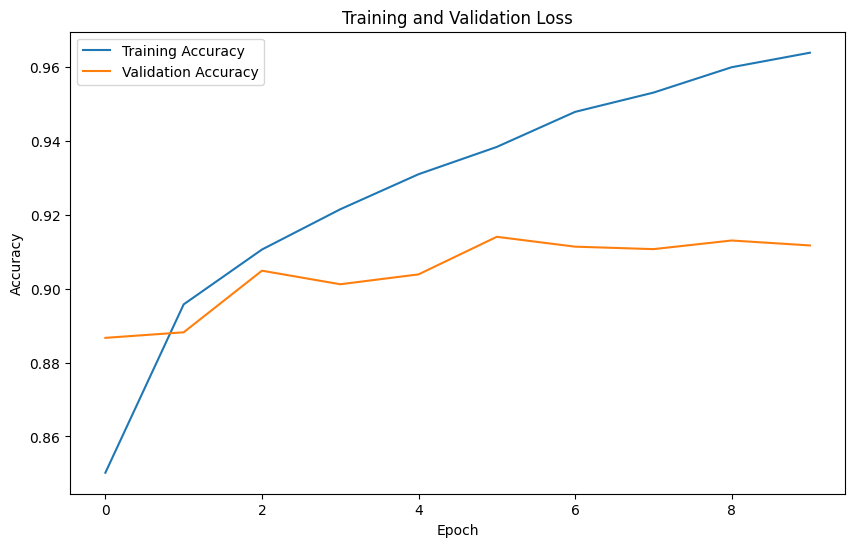

In [ ]:
# Access training and validation loss values from history
training_accuracy = history1.history['accuracy']
validation_accuracy = history1.history['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## b)Design CNN-2 which contains:                                                                                                         Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride= 1, and padding =0.                                     One Pooling layer which uses MAXPOOLING with stride =2.                                                                                    One hidden layer having number of neurons = 100

In [ ]:
model_cnn2=tf.keras.Sequential()
model_cnn2.add(tf.keras.layers.Input(shape=[28,28,1]))
model_cnn2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid",strides=1)) #padding="same"
model_cnn2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid",strides=1))
model_cnn2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2)) #AveragePooling2D
model_cnn2.add(tf.keras.layers.Flatten())
model_cnn2.add(tf.keras.layers.Dense(100,activation="relu"))
model_cnn2.add(tf.keras.layers.Dense(10,activation="softmax"))

In [ ]:
model_cnn2.compile(optimizer="adam",loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model_cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               460900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [ ]:
history2=model_cnn2.fit(x_train, y_train, batch_size=16, epochs=15, validation_split=0.1)

Epoch 1/15
3375/3375 [==============================] - 14s 4ms/step - loss: 0.3787 - accuracy: 0.8643 - val_loss: 0.2973 - val_accuracy: 0.8897
Epoch 2/15
3375/3375 [==============================] - 12s 4ms/step - loss: 0.2390 - accuracy: 0.9139 - val_loss: 0.2685 - val_accuracy: 0.9033
Epoch 3/15
3375/3375 [==============================] - 13s 4ms/step - loss: 0.1842 - accuracy: 0.9321 - val_loss: 0.2484 - val_accuracy: 0.9068
Epoch 4/15
3375/3375 [==============================] - 13s 4ms/step - loss: 0.1436 - accuracy: 0.9463 - val_loss: 0.2545 - val_accuracy: 0.9185
Epoch 5/15
3375/3375 [==============================] - 12s 4ms/step - loss: 0.1113 - accuracy: 0.9583 - val_loss: 0.2470 - val_accuracy: 0.9235
Epoch 6/15
3375/3375 [==============================] - 12s 4ms/step - loss: 0.0858 - accuracy: 0.9681 - val_loss: 0.3199 - val_accuracy: 0.9077
Epoch 7/15
3375/3375 [==============================] - 12s 4ms/step - loss: 0.0664 - accuracy: 0.9753 - val_loss: 0.3015 - val_ac

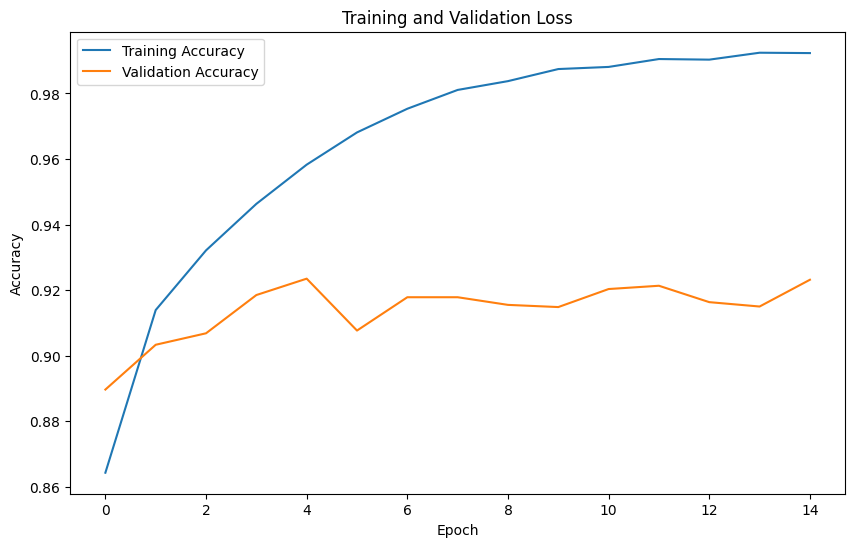

In [ ]:
# Access training and validation loss values from history
training_accuracy = history2.history['accuracy']
validation_accuracy = history2.history['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## c. Train and test the networks (choose the best epoch size so that there is no overfitting).
## d. Plot the performance curves for CNN-1 and CNN-2.
## e. Compare the performances of CNN-1 and CNN-2.

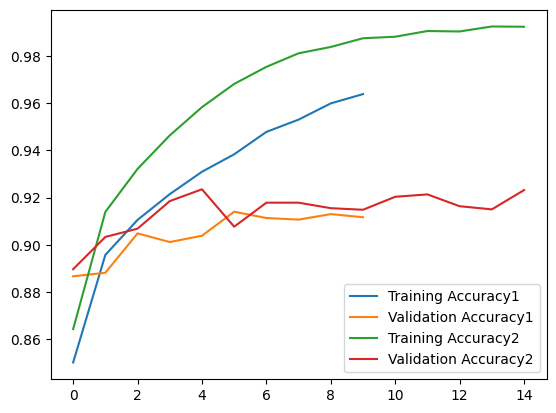

In [ ]:
training_accuracy2 = history2.history['accuracy']
validation_accuracy2 = history2.history['val_accuracy']
training_accuracy1 = history1.history['accuracy']
validation_accuracy1 = history1.history['val_accuracy']
plt.plot(training_accuracy1, label='Training Accuracy1')
plt.plot(validation_accuracy1, label='Validation Accuracy1')
plt.plot(training_accuracy2, label='Training Accuracy2')
plt.plot(validation_accuracy2, label='Validation Accuracy2')
plt.legend()

#### As we can see from the side by side comparison that the accuracy of CNN2 is higher than that of CNN1

## Q4) Compare the performances of FCNN and CNN.


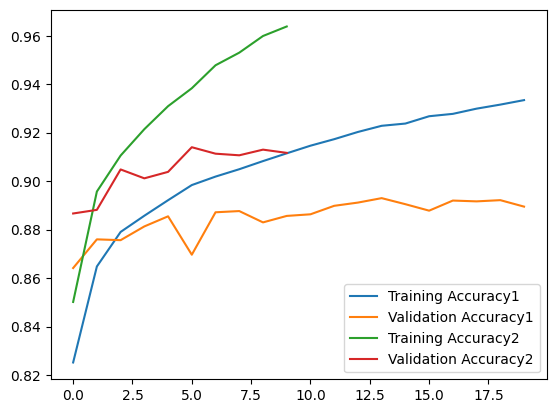

In [ ]:
training_accuracy_fcnn = history.history['accuracy']
validation_accuracy_fcnn = history.history['val_accuracy']
training_accuracy_cnn1 = history1.history['accuracy']
validation_accuracy_cnn1 = history1.history['val_accuracy']
plt.plot(training_accuracy_fcnn, label='Training Accuracy1')
plt.plot(validation_accuracy_fcnn, label='Validation Accuracy1')
plt.plot(training_accuracy_cnn1, label='Training Accuracy2')
plt.plot(validation_accuracy_cnn1, label='Validation Accuracy2')
plt.legend()

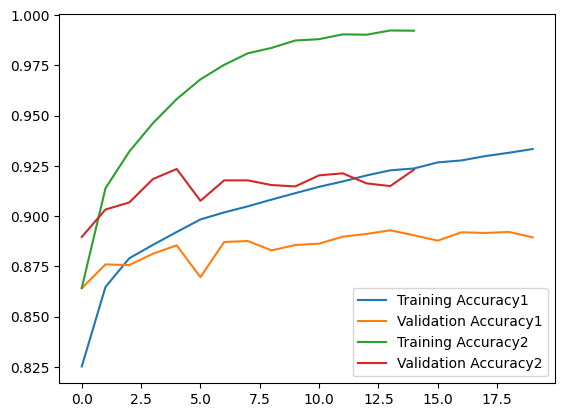

In [ ]:
training_accuracy_fcnn = history.history['accuracy']
validation_accuracy_fcnn = history.history['val_accuracy']
training_accuracy_cnn2 = history2.history['accuracy']
validation_accuracy_cnn2 = history2.history['val_accuracy']
plt.plot(training_accuracy_fcnn, label='Training Accuracy1')
plt.plot(validation_accuracy_fcnn, label='Validation Accuracy1')
plt.plot(training_accuracy_cnn2, label='Training Accuracy2')
plt.plot(validation_accuracy_cnn2, label='Validation Accuracy2')
plt.legend()

#### As we can clearly observe from both the graph plots that both the CNN1 and CNN2 models provide much higher accuracy than the FCNN

## Q5) Compare the number of parameters in the FCNN and the CNN

#### The number of parameters in FCNN are 266610 while the number of parameters in CNN1 and CNN2 are 462742 and 471478 respectively

## Q6) Discuss the computational efficiency of both networks. Which one took longer to train and why?

#### The computational efficiency order is CNN2>CNN1>FCNN. The training accuracy score and the validation accuracy score define the performance of the models and it is clear that CNN2 is better than CNN1 which is better than FCNN.

#### It took longer time to train CNN2 than CNN1 which took more time than FCNN. The reason for that is that CNN2 contained the most number of parameters followed by CNN1 and FCNN. The increased number of parameters resulted in the computation taking more time